**Project**

สร้าง Bollinger Bands จากเส้น SMA สองเส้นที่ +/-2SD ตาม Asset Class ที่เราชอบ

Thaistock : <a href='https://colab.research.google.com/drive/1NKNqqtUUuqom0oU_Um9rOkqssdkAOteW?usp=sharing'>Thai Stock</a>

Crypto : <a herf='https://colab.research.google.com/drive/1zJKbfUzkORX-2qKMEilsVUfYO4WMhM73?usp=sharing'>Crypto</a> 

## Import Libraries

In [40]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf

## Import Dataset

In [41]:
# define stock and date
ticker_name = 'BBL.BK'
start='2020-01-01' 
end='2021-12-31'

In [42]:
raw_df = yf.download(tickers=ticker_name, start=start, end=end)
raw_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,161.0,163.5,160.5,163.5,147.786743,11084000
2020-01-03,163.0,163.0,160.0,160.5,145.075058,10606900
2020-01-06,158.0,158.5,156.0,156.0,141.007538,12765000
2020-01-07,157.0,157.5,151.0,156.5,141.459503,17097500
2020-01-08,153.5,155.0,153.0,153.0,138.295853,9302200
...,...,...,...,...,...,...
2021-12-24,119.0,119.0,117.5,118.0,114.578316,3199200
2021-12-27,118.5,118.5,117.5,118.0,114.578316,4147400
2021-12-28,118.0,120.5,118.0,119.5,116.034821,7532900


## Bollinger Bands

In [43]:
def get_bollinger_bands(prices, sd, rate=20):
    # get sma and std
    sma = prices.rolling(rate).mean()
    std = prices.rolling(rate).std()

    # get bollinger band
    bollinger_up = sma + std * sd # top band
    bollinger_down = sma - std * sd # bottom band
    
    return bollinger_up, bollinger_down

In [44]:
# 1SD & 2SD bollinger bands
bol_1_up, bol_1_down = get_bollinger_bands(raw_df['Close'], 1, 20)
bol_2_up, bol_2_down = get_bollinger_bands(raw_df['Close'], 2, 20)

In [66]:
# creat 'added_plots' type 'dict' because we want to make an legend for visualization
added_plots = {
            '1_SD_UP'  :    mpf.make_addplot(bol_1_up, color='grey'),
            '1_SD_DOWN'  :    mpf.make_addplot(bol_1_down, color='grey'),
            '2_SD_UP'  :    mpf.make_addplot(bol_2_up, color='royalblue'),
            '2_SD_DOWN'  :   mpf.make_addplot(bol_2_down, color='royalblue')
}

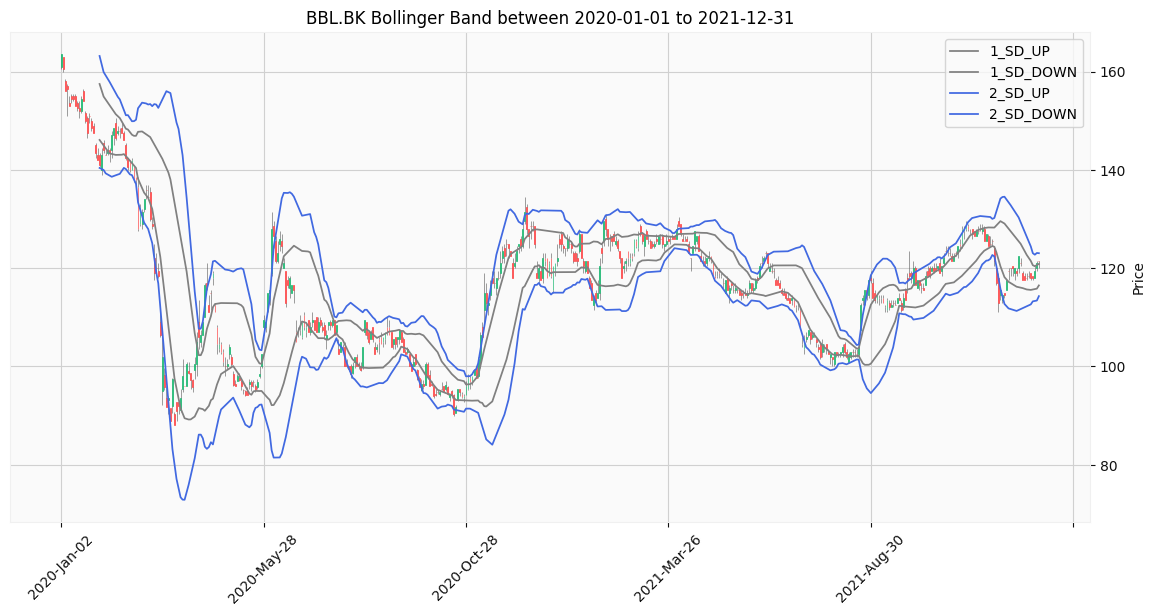

In [67]:
fig, axes = mpf.plot(   raw_df, style='yahoo', type='candle', addplot=list(added_plots.values()),
            axtitle=f'{ticker_name} Bollinger Band between {start} to {end}', figsize=(15, 7),
            returnfig=True)

# added legend
axes[0].legend([None]*(len(added_plots)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:],labels=list(added_plots.keys()))